Week 11 Pandas Demo

In [16]:
import pandas as pd

df = pd.read_csv("/workspaces/data_3500_in_class_code/Lecture_code/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# identifying nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Age"].head(7)

/tmp/ipykernel_13459/4127818849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
Name: Age, dtype: float64

In [19]:
# rename column
df = df.rename(columns={"Pclass":"Class"})
df = df.rename(columns={"Parch":"Parent/Child"})
df = df.rename(columns={"SibSp":"Sibling/Spouse"})
df.head()

,PassengerId,Survived,Class,Name,Sex,Age,Sibling/Spouse,Parent/Child,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df["Survived"] = df["Survived"].astype(bool)
df.head()

,PassengerId,Survived,Class,Name,Sex,Age,Sibling/Spouse,Parent/Child,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# create new column
df["Family Size"] = df["Sibling/Spouse"] + df["Parent/Child"] + 1
df.head()

,PassengerId,Survived,Class,Name,Sex,Age,Sibling/Spouse,Parent/Child,Ticket,Fare,Cabin,Embarked,Family Size
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [22]:
# grouping
df.groupby("Sex")["Survived"].mean()
df.groupby(["Class", "Sex"])["Survived"].mean()

Class  Sex   
1      female    0.968085
       male      0.368852
2      female    0.921053
       male      0.157407
3      female    0.500000
       male      0.135447
Name: Survived, dtype: float64

In [23]:
# sort and aggregate
df.groupby("Class")["Fare"].agg(["mean", "median", "count"])

,mean,median,count
Class,,,
1,84.154687,60.2875,216
2,20.662183,14.2500,184
3,13.675550,8.0500,491


<Axes: >

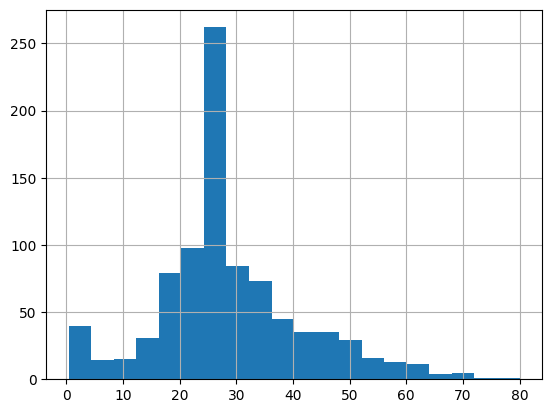

In [27]:
# visualize
df["Age"].hist(bins=20)

<Axes: xlabel='Sex'>

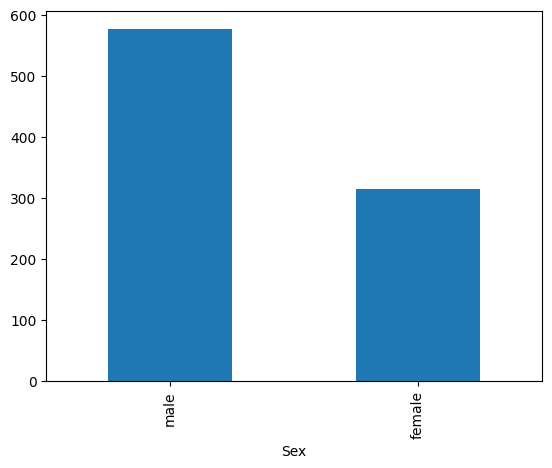

In [28]:
df["Sex"].value_counts().plot(kind="bar")